# 2024-2 언어데이터과학 19강 (2024-11-28) 실습 (2) Word2Vec 단어 벡터 시각화

## 0. 준비

### Source Hans Sans K 글꼴 설치하기

In [1]:
!sudo wget https://raw.githubusercontent.com/adobe-fonts/source-han-sans/release/OTF/Korean/SourceHanSansK-Regular.otf -O /usr/share/fonts/SourceHanSansK-Regular.otf
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

--2024-11-28 04:15:33--  https://raw.githubusercontent.com/adobe-fonts/source-han-sans/release/OTF/Korean/SourceHanSansK-Regular.otf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16433304 (16M) [application/octet-stream]
Saving to: ‘/usr/share/fonts/SourceHanSansK-Regular.otf’

/usr/share/fonts/So 100%[===================>]  15.67M  --.-KB/s    in 0.06s   

2024-11-28 04:15:33 (242 MB/s) - ‘/usr/share/fonts/SourceHanSansK-Regular.otf’ saved [16433304/16433304]

/usr/share/fonts: caching, new cache contents: 1 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 6 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/home/codespace/.

### Python 모듈 설치하기

In [2]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


## 1. Word2Vec 벡터 모델

In [3]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

### 기존 모델 로드하기

In [4]:
MODEL_PATH = '../models/word2vec-modu-online'

model = Word2Vec.load(MODEL_PATH)

### 예시: 정도부사 분류하기

In [5]:
model.wv.most_similar(['아주'])

[('매우', 0.7714052796363831),
 ('굉장히', 0.6949530243873596),
 ('상당히', 0.6894147396087646),
 ('무지', 0.6877973675727844),
 ('무척', 0.6787397861480713),
 ('넘나', 0.6555966734886169),
 ('그저', 0.6456524133682251),
 ('운이', 0.6256696581840515),
 ('훨씬', 0.6198590993881226),
 ('되게', 0.6186764240264893)]

In [6]:
mags = ['아주', '매우', '굉장히', '상당히', '조금']
model.wv.doesnt_match(mags)

'조금'

In [7]:
model.wv.most_similar(['완전'])

[('짱', 0.7012233138084412),
 ('되게', 0.643863320350647),
 ('디게', 0.6269715428352356),
 ('대박', 0.6215198636054993),
 ('무지', 0.6200389266014099),
 ('넘나', 0.6100852489471436),
 ('장난', 0.6009043455123901),
 ('왕', 0.5968322157859802),
 ('너뮤', 0.5880658626556396),
 ('진쨔', 0.5750538110733032)]

In [8]:
model.wv.most_similar(['조금'])

[('좀', 0.8237645626068115),
 ('살짝', 0.7540523409843445),
 ('쫌', 0.7163634300231934),
 ('조금만', 0.6599279642105103),
 ('좀더', 0.6361435055732727),
 ('쪼금', 0.633787214756012),
 ('쪼끔', 0.6109402775764465),
 ('조금씩', 0.5960263013839722),
 ('꽤', 0.5780529379844666),
 ('확실히', 0.5769070982933044)]

In [9]:
model.wv.most_similar(['약간'])

[('뭔가', 0.7129360437393188),
 ('먼가', 0.6784123182296753),
 ('살짝', 0.6454625129699707),
 ('왠지', 0.6283128261566162),
 ('특유의', 0.6180962324142456),
 ('몬가', 0.6167038083076477),
 ('느낌', 0.597087025642395),
 ('뭐랄까', 0.5918446183204651),
 ('비슷한데', 0.5752758383750916),
 ('뭔가..', 0.5708717703819275)]

In [10]:
words = [
    '아주', '매우', '굉장히', '상당히', '무척',
    '완전', '짱', '디게', '대박', '넘나',
    '조금', '좀', '쫌', '쪼금', '조금',
    '약간', '뭔가', '먼가', '살짝', '왠지'
    ]

In [11]:
matrix = pd.DataFrame(np.stack([model.wv[word] for word in words])) # EDIT THIS LINE
matrix

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.059727,-0.518509,-0.444338,-0.004402,-0.068652,0.049549,0.001787,0.084620,0.403844,-0.181454,...,0.282591,0.043789,-0.071607,0.303378,0.284749,-0.076846,-0.128321,-0.054676,0.034123,-0.259315
1,-0.095537,-0.326948,-0.190604,0.183749,0.301877,-0.049006,0.148016,0.265454,0.121525,-0.038126,...,0.406026,-0.114071,-0.124953,0.167698,0.030050,0.280228,-0.237818,0.064671,0.032956,-0.147973
2,0.068447,-0.087925,-0.073892,0.244577,0.190025,-0.192567,0.440369,0.455747,-0.059549,0.038016,...,0.284925,0.045770,0.265932,0.954420,0.121023,0.344509,0.042013,0.000219,0.158498,-0.300505
3,-0.050827,0.052770,0.008776,-0.022916,0.046126,-0.172411,0.204570,0.504722,0.092690,-0.074854,...,0.212866,0.055719,0.225772,0.276266,0.040726,0.411934,-0.107202,-0.159815,-0.065178,-0.148890
4,0.068595,-0.165692,-0.284915,0.090831,-0.058499,-0.192451,0.350533,0.484647,-0.101378,0.107874,...,0.308287,-0.112323,0.205378,0.381017,-0.058258,0.311618,-0.053754,-0.444838,-0.005005,0.052787
5,-0.072832,-0.144676,-0.369727,0.206178,0.077248,-0.199590,0.594658,0.129988,0.006271,0.181713,...,-0.048767,0.053056,0.936757,0.872917,-0.240802,0.272154,0.347659,-0.386829,-0.036572,0.496625
6,-0.450339,-0.063697,-0.897784,0.152887,0.296131,-0.243188,0.387451,0.098671,-0.543226,0.110720,...,0.146557,-0.302325,0.099285,0.471108,-0.146346,0.506155,0.173568,-0.385892,-0.191314,0.141691
7,0.045406,-0.165491,-0.279963,-0.190114,0.023149,-0.099911,0.042556,0.332088,0.091588,-0.149055,...,0.321278,-0.000265,0.002876,0.142782,-0.299622,0.495099,-0.106177,-0.254428,0.059616,-0.044440
8,-0.336463,0.283443,-0.043735,-0.046519,0.773380,-0.023517,0.456981,0.230182,-0.659895,0.024890,...,0.291363,-0.388060,0.113386,-0.075841,-0.310126,0.307576,-0.016271,-1.062806,-0.164952,0.307481
9,-0.127082,-0.479125,-0.380856,0.247632,0.152470,0.001808,0.444041,0.153503,0.015380,0.120528,...,0.192869,-0.107638,-0.014254,0.248285,-0.339439,0.351637,0.024389,-0.441445,-0.431570,0.068523


In [12]:
matrix.index = words
matrix

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
아주,-0.059727,-0.518509,-0.444338,-0.004402,-0.068652,0.049549,0.001787,0.084620,0.403844,-0.181454,...,0.282591,0.043789,-0.071607,0.303378,0.284749,-0.076846,-0.128321,-0.054676,0.034123,-0.259315
매우,-0.095537,-0.326948,-0.190604,0.183749,0.301877,-0.049006,0.148016,0.265454,0.121525,-0.038126,...,0.406026,-0.114071,-0.124953,0.167698,0.030050,0.280228,-0.237818,0.064671,0.032956,-0.147973
굉장히,0.068447,-0.087925,-0.073892,0.244577,0.190025,-0.192567,0.440369,0.455747,-0.059549,0.038016,...,0.284925,0.045770,0.265932,0.954420,0.121023,0.344509,0.042013,0.000219,0.158498,-0.300505
상당히,-0.050827,0.052770,0.008776,-0.022916,0.046126,-0.172411,0.204570,0.504722,0.092690,-0.074854,...,0.212866,0.055719,0.225772,0.276266,0.040726,0.411934,-0.107202,-0.159815,-0.065178,-0.148890
무척,0.068595,-0.165692,-0.284915,0.090831,-0.058499,-0.192451,0.350533,0.484647,-0.101378,0.107874,...,0.308287,-0.112323,0.205378,0.381017,-0.058258,0.311618,-0.053754,-0.444838,-0.005005,0.052787
완전,-0.072832,-0.144676,-0.369727,0.206178,0.077248,-0.199590,0.594658,0.129988,0.006271,0.181713,...,-0.048767,0.053056,0.936757,0.872917,-0.240802,0.272154,0.347659,-0.386829,-0.036572,0.496625
짱,-0.450339,-0.063697,-0.897784,0.152887,0.296131,-0.243188,0.387451,0.098671,-0.543226,0.110720,...,0.146557,-0.302325,0.099285,0.471108,-0.146346,0.506155,0.173568,-0.385892,-0.191314,0.141691
디게,0.045406,-0.165491,-0.279963,-0.190114,0.023149,-0.099911,0.042556,0.332088,0.091588,-0.149055,...,0.321278,-0.000265,0.002876,0.142782,-0.299622,0.495099,-0.106177,-0.254428,0.059616,-0.044440
대박,-0.336463,0.283443,-0.043735,-0.046519,0.773380,-0.023517,0.456981,0.230182,-0.659895,0.024890,...,0.291363,-0.388060,0.113386,-0.075841,-0.310126,0.307576,-0.016271,-1.062806,-0.164952,0.307481
넘나,-0.127082,-0.479125,-0.380856,0.247632,0.152470,0.001808,0.444041,0.153503,0.015380,0.120528,...,0.192869,-0.107638,-0.014254,0.248285,-0.339439,0.351637,0.024389,-0.441445,-0.431570,0.068523


## 2. 차원 축소

100차원 벡터를 2차원으로 축소해서 좌표평면에 나타낼 수 있게 만든다.

In [13]:
tsne = TSNE(perplexity=1, random_state=174)
matrix2d = tsne.fit_transform(matrix)
matrix2d

array([[-573.80023  ,  106.07822  ],
       [-509.81512  ,   -1.9482083],
       [-575.9756   , -108.18516  ],
       [-140.08797  ,  -16.021063 ],
       [-147.67258  , -105.941315 ],
       [ 162.96817  , -522.20734  ],
       [  32.961792 , -503.8553   ],
       [ -34.444836 , -366.71002  ],
       [ -27.820189 , -619.9766   ],
       [-232.97824  , -201.0619   ],
       [ 234.3919   ,  845.68097  ],
       [ 851.5705   , -177.25603  ],
       [-280.2545   ,  289.51508  ],
       [-171.34831  ,  220.42036  ],
       [ 234.3919   ,  845.68097  ],
       [ 194.25267  ,  -92.40107  ],
       [ 337.42792  ,  191.93248  ],
       [ 136.55904  ,   17.88418  ],
       [ -80.20856  ,  311.10645  ],
       [ 237.87372  ,  120.98105  ]], dtype=float32)

In [14]:
matrix2d = pd.DataFrame(matrix2d)
matrix2d.index = words
matrix2d.columns = ['x', 'y']
matrix2d['category'] = ['aug'] * 10 + ['dim'] * 10
matrix2d

,x,y,category
아주,-573.800232,106.078217,aug
매우,-509.815125,-1.948208,aug
굉장히,-575.975586,-108.185158,aug
상당히,-140.087967,-16.021063,aug
무척,-147.672577,-105.941315,aug
완전,162.968170,-522.207336,aug
짱,32.961792,-503.855286,aug
디게,-34.444836,-366.710022,aug
대박,-27.820189,-619.976624,aug
넘나,-232.978241,-201.061905,aug


## 3. 시각화

### 산점도(scatterplot)

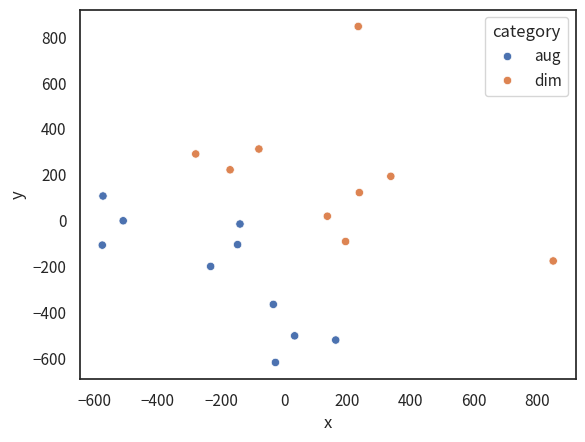

In [15]:
sns.set_theme(font='Source Han Sans K', style='white')

ax = sns.scatterplot(data=matrix2d, x='x', y='y', hue='category') # EDIT THIS LINE


<Axes: >

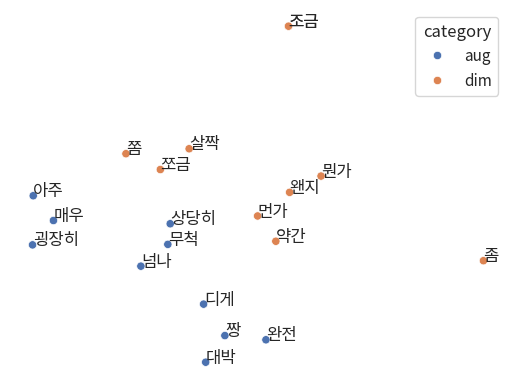

In [16]:
ax = sns.scatterplot(data=matrix2d, x='x', y='y', hue='category') # EDIT THIS LINE

for index, row in matrix2d.iterrows():
    ax.text(row['x']+.5, row['y'], index)


ax.set(xticklabels=[], yticklabels=[], xlabel='', ylabel='')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)

ax